<a href="https://colab.research.google.com/github/pranavrajwade/Introduction_to_EDA/blob/master/Rossman_Sales_Intro_to_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Exploratory Data Analysis -  Rossmann Sales Data

**What is Exploratory Data Analysis?**

Exploratory data analysis (EDA) is a crucial component of data analytics which allows you to develop the gist of what your data look like and what kinds of questions might be answered by them.

## Importing Libraries

In [0]:
# importing libraries

import pandas as pd
import plotly as plot
import numpy as np
import datetime as dt
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats

## Downloading Data

In [0]:
KAGGLEUSERNAME = "pranavra"

In [0]:
KAGGLEKEY = "148ff57fe0b98b1b1de08ee4f7dd5c0e"

In [0]:
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (KAGGLEUSERNAME, KAGGLEKEY))
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download rossmann-store-sales
!ls

  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 70.8MB/s]
 75% 5.00M/6.71M [00:00<00:00, 7.33MB/s]
100% 6.71M/6.71M [00:00<00:00, 9.16MB/s]
  0% 0.00/44.0k [00:00<?, ?B/s]
100% 44.0k/44.0k [00:00<00:00, 44.8MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 103MB/s]
sample_data  sample_submission.csv  store.csv  test.csv.zip  train.csv.zip


## Loading Data

In [0]:
store = pd.read_csv('/content/store.csv', sep=',')
test = pd.read_csv('/content/test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
train = pd.read_csv('/content/train.csv.zip', compression='zip', header=0, sep=',', quotechar='"', low_memory=False)

### Store Data

In [0]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [0]:
print('Store data dimensions : {}'.format(store.shape))

Store data dimensions : (1115, 10)


In [0]:
print('Primary Statistics for Store Data : ')
store.describe().T

Primary Statistics for Store Data : 


,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


### Train Data

In [0]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [0]:
print('Train data dimensions : {}'.format(train.shape))

Train data dimensions : (1017209, 9)


In [0]:
print('Primary Statistics for Train Data')
train.describe().T

Primary Statistics for Train Data


,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


### Test Data

In [0]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [0]:
print('Test data dimensions : {}'.format(test.shape))

Test data dimensions : (41088, 8)


In [0]:
print('Primary Statistics for Test Data : ')
test.describe().T

Primary Statistics for Test Data : 


,count,mean,std,min,25%,50%,75%,max
Id,41088.0,20544.500000,11861.228267,1.0,10272.75,20544.5,30816.25,41088.0
Store,41088.0,555.899533,320.274496,1.0,279.75,553.5,832.25,1115.0
DayOfWeek,41088.0,3.979167,2.015481,1.0,2.00,4.0,6.00,7.0
Open,41077.0,0.854322,0.352787,0.0,1.00,1.0,1.00,1.0
Promo,41088.0,0.395833,0.489035,0.0,0.00,0.0,1.00,1.0
SchoolHoliday,41088.0,0.443487,0.496802,0.0,0.00,0.0,1.00,1.0


# Exploratory Data Analysis

## Data Pre processing

In [0]:
#    - Remove entries where the store were not open and the sales were zero
#    - Separate Month and Year and one more column with Month_Yr
#    - Create a new table by merging store and train tables
#    - Any other necessary data cleaning or processing

Discovering closed stores

**Note:** Here we will remove all the data where the store was either closed or was open, but has zero sales for the day.

In [0]:
total_len = len(train.index)

In [0]:
total_len

1017209

In [0]:
# Closed Stores

train[(train["Open"] == 0)].describe().T

,count,mean,std,min,25%,50%,75%,max
Store,172817.0,558.462987,322.771734,1.0,279.0,560.0,839.0,1115.0
DayOfWeek,172817.0,6.333769,1.547688,1.0,7.0,7.0,7.0,7.0
Sales,172817.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Customers,172817.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Open,172817.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Promo,172817.0,0.064716,0.246025,0.0,0.0,0.0,0.0,1.0
SchoolHoliday,172817.0,0.105684,0.307434,0.0,0.0,0.0,0.0,1.0


### Descovering zero sales open stores

In [0]:
# Open Stores with no sales

train[(train["Open"] != 0) & (train['Sales'] == 0)].describe().T

,count,mean,std,min,25%,50%,75%,max
Store,54.0,582.592593,340.093190,25.0,330.0,662.0,885.75,1100.0
DayOfWeek,54.0,3.703704,1.312202,1.0,3.0,4.0,4.00,6.0
Sales,54.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Customers,54.0,0.148148,0.786859,0.0,0.0,0.0,0.00,5.0
Open,54.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
Promo,54.0,0.388889,0.492076,0.0,0.0,0.0,1.00,1.0
SchoolHoliday,54.0,0.222222,0.419643,0.0,0.0,0.0,0.00,1.0


In [0]:
zero_value = len(train[(train["Open"] == 0)]) + len(train[(train["Open"] != 0) & (train['Sales'] == 0)])

In [0]:
percent_zero = (zero_value/total_len)*100
percent_zero

16.994639253093514

**Note** : Approximately 17% of data has zero sales and shall be excluded.

### Removing unnecessary data

In [0]:
# removing data with closed stores and open stores having zero sales

train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,844338.0,558.421374,321.730861,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844338.0,3.520350,1.723712,1.0,2.0,3.0,5.0,7.0
Sales,844338.0,6955.959134,3103.815515,46.0,4859.0,6369.0,8360.0,41551.0
Customers,844338.0,762.777166,401.194153,8.0,519.0,676.0,893.0,7388.0
Open,844338.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Promo,844338.0,0.446356,0.497114,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844338.0,0.193578,0.395102,0.0,0.0,0.0,0.0,1.0


### Extracting Year and Month Columns

In [0]:
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
train['Year'] = train['Date'].dt.year
train['Month_Yr'] =  train['Date'].apply(lambda x: x.strftime('%Y-%m'))

## Checking null rows

In [0]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month_Yr         0
dtype: int64

No null values in train data.

In [0]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [0]:
# Stores with null CompetitionDistnace
print("Stores with null values in CompetitionDistance column:")
store[store['CompetitionDistance'].isnull()]

Stores with null values in CompetitionDistance column:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


**Note** : 

We will insert the median value for the missing competition distances and 0's in all other cases.


In [0]:
#fill na's in Competition distance with median values

store["CompetitionDistance"] = store["CompetitionDistance"].fillna(store["CompetitionDistance"].median())

In [0]:
## Blank entries from columns Promo2 (Store Data) & Promo2Since (Store Data)
## will be eliminated.

store.fillna(0, inplace = True)

In [0]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## Create Master Table

In [0]:
# Create a new table by merging store and train tables

master_table = pd.merge(train, store, on='Store')

In [0]:
master_table.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month_Yr,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [0]:
master_table.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,844338.0,558.421374,321.730861,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844338.0,3.520350,1.723712,1.0,2.0,3.0,5.0,7.0
Sales,844338.0,6955.959134,3103.815515,46.0,4859.0,6369.0,8360.0,41551.0
Customers,844338.0,762.777166,401.194153,8.0,519.0,676.0,893.0,7388.0
Open,844338.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Promo,844338.0,0.446356,0.497114,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844338.0,0.193578,0.395102,0.0,0.0,0.0,0.0,1.0
Year,844338.0,2013.831945,0.777271,2013.0,2013.0,2014.0,2014.0,2015.0
CompetitionDistance,844338.0,5450.044852,7801.082007,20.0,710.0,2325.0,6880.0,75860.0
CompetitionOpenSinceMonth,844338.0,4.926482,4.283634,0.0,0.0,4.0,9.0,12.0


In [0]:
print('Master Table dimensions : {}'.format(master_table.shape))

Master Table dimensions : (844338, 20)


## Correlation Plot


Let's check correlations between variables using heatmap (seaborn).

In [0]:
corr_plot = master_table.drop('Open', axis = 1).corr()

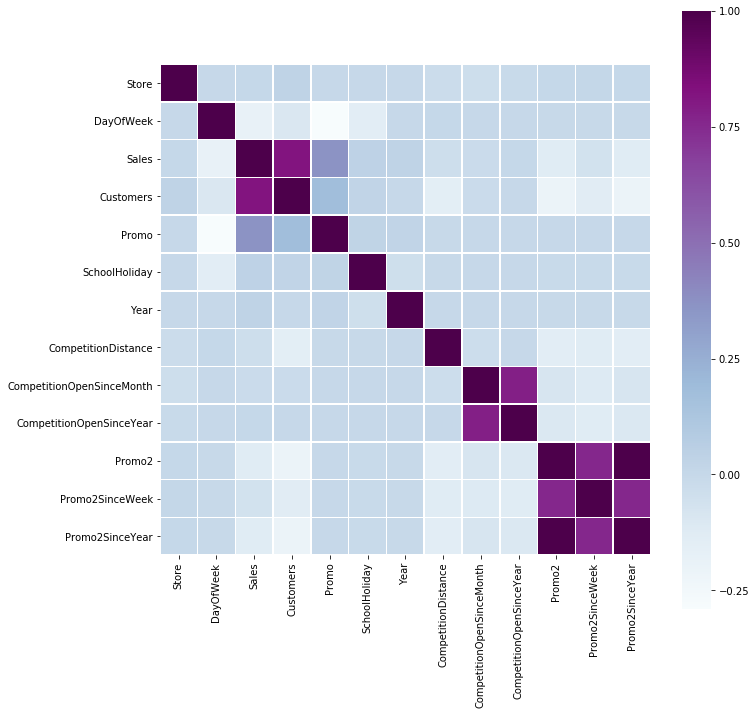

In [0]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 11))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_plot,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

Here we can see a positive correlation between Customerts and Sales as well as Promo and both Customer and Sales.


However, negative correlation can be seen between Promo2 (if promo continues) and Customers as well as Sales. 

## Univariate & Bivariet Analysis

### Sales & Customers
- Histogram
- Trend
- Boxplot

In [0]:
## 'train' data univariates analysis
## find mean sales per day, per month, perdaycustomer.

In [0]:
trends = train.groupby('Month_Yr')['Sales'].mean()
trends = trends.reset_index()
trends.columns = ['Month_Yr', 'Sales_Average']
trends.head()

,Month_Yr,Sales_Average
0,2013-01,6240.506045
1,2013-02,6428.838730
2,2013-03,7213.092718
3,2013-04,6579.791664
4,2013-05,7077.028245


In [0]:
cust_trends = train.groupby('Month_Yr')['Customers'].mean()
cust_trends = cust_trends.reset_index()
cust_trends.columns = ['Month_Yr', 'Customers_Average']
cust_trends.head()

,Month_Yr,Customers_Average
0,2013-01,706.060038
1,2013-02,721.252830
2,2013-03,787.690008
3,2013-04,749.062343
4,2013-05,791.018207


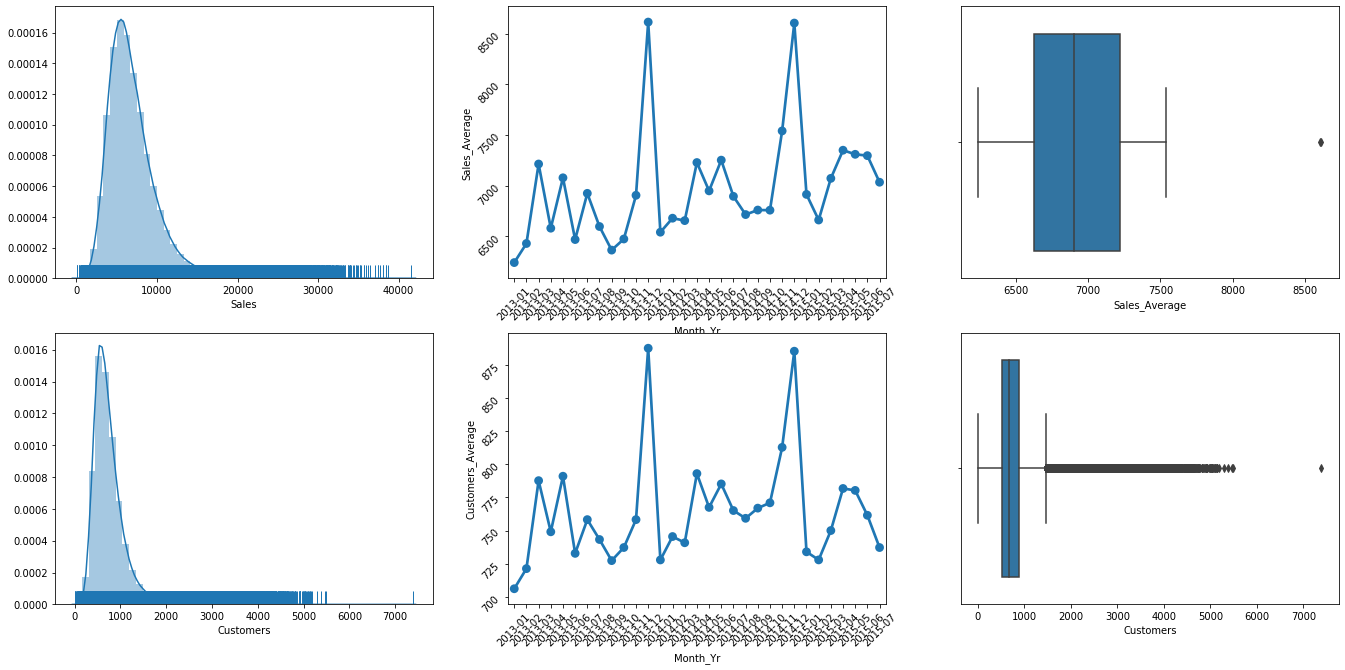

In [0]:
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize = (23,11))
axs[0,1].tick_params(labelrotation=45)
axs[1,1].tick_params(labelrotation=45)


sns.distplot(train.Sales, rug=True,ax=axs[0,0]);

sns.pointplot(x="Month_Yr", y="Sales_Average", data=trends, ax=axs[0,1]);


sns.boxplot(x=trends.Sales_Average,ax=axs[0,2]);

sns.distplot(train.Customers, rug=True, ax=axs[1,0]);

sns.pointplot(x="Month_Yr", y="Customers_Average", data=cust_trends, ax = axs[1,1]);


sns.boxplot(x=train.Customers, ax = axs[1,2]);

Note : Sales and Customers have similar distributions.

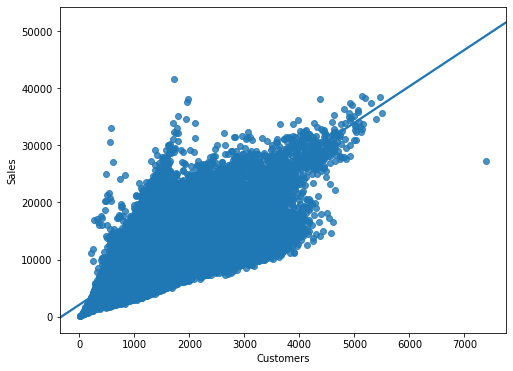

In [0]:
dims = (8,6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.regplot(x="Customers", y="Sales", fit_reg=True, data=master_table)

### Promo
- Promo
- Promo2

In [0]:
## Promo (train data)

count_promo = train.pivot_table(index=['Promo'],values=["Store"], aggfunc='count')
count_promo.columns = ['Count']
count_promo

,Count
Promo,
0,467463
1,376875


In [0]:
count_promo2 = master_table.pivot_table(index=['Promo2'],values=["Store"], aggfunc='count')
count_promo2.columns = ['Count']
count_promo2

,Count
Promo2,
0,423292
1,421046


In [0]:
promo_compare = master_table.groupby(['Promo', 'Promo2'])['Sales'].count()
promo_compare = promo_compare.reset_index()
promo_compare.columns = ['Promo', 'Promo2', 'Count']
promo_compare

,Promo,Promo2,Count
0,0,0,234287
1,0,1,233176
2,1,0,189005
3,1,1,187870


In [0]:
pivot_promo = train.pivot_table(index=['Promo'],values=["Sales", "Customers"], aggfunc='mean')
pivot_promo

,Customers,Sales
Promo,,
0,696.906080,5929.826183
1,844.481433,8228.739731


Note : Stores which are running promotions are attracting more number of customers as well as more average Sales.




In [0]:
pivot_promo2 = master_table.pivot_table(index=['Promo2'],values=["Sales", "Customers"], aggfunc='mean')
pivot_promo2

,Customers,Sales
Promo2,,
0,843.685884,7350.818414
1,681.436855,6558.993542


Note : Stores which continue the promotions show less number of customers and average sales as well.

In [0]:
promo_compare_mean = master_table.groupby(['Promo', 'Promo2'])['Sales', 'Customers'].mean()
promo_compare_mean

Sales   Customers
Promo Promo2                         
0     0       6328.187633  775.176548
      1       5529.566684  618.262681
1     0       8618.452062  928.608751
      1       7836.672987  759.845867

In [0]:
promo_compare_median = master_table.groupby(['Promo', 'Promo2'])['Sales', 'Customers'].median()
promo_compare_median

Sales  Customers
Promo Promo2                  
0     0        5757        676
      1        5181        554
1     0        7950        833
      1        7358        689

In [0]:
promo_compare_deviation = master_table.groupby(['Promo', 'Promo2'])['Sales', 'Customers'].std()
promo_compare_deviation

Sales   Customers
Promo Promo2                         
0     0       2977.808321  446.755737
      1       2151.704466  300.496557
1     0       3450.224837  444.867987
      1       2818.324929  330.933118

Note : Stores that participated in consicutive Promotions are showing lesser average number of customers than the stores which are not participating in Promotion. The average sales follows the same pattern.

#### Deep Dive 

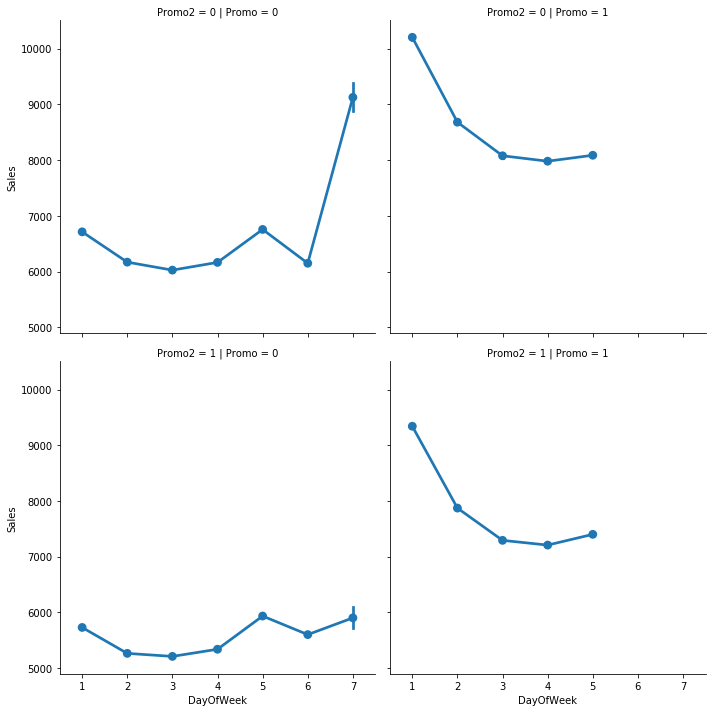

In [0]:
## Sales per DayOfWeek according to Promo and Promo 2
t = sns.catplot(data = master_table, kind = 'point', x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2')

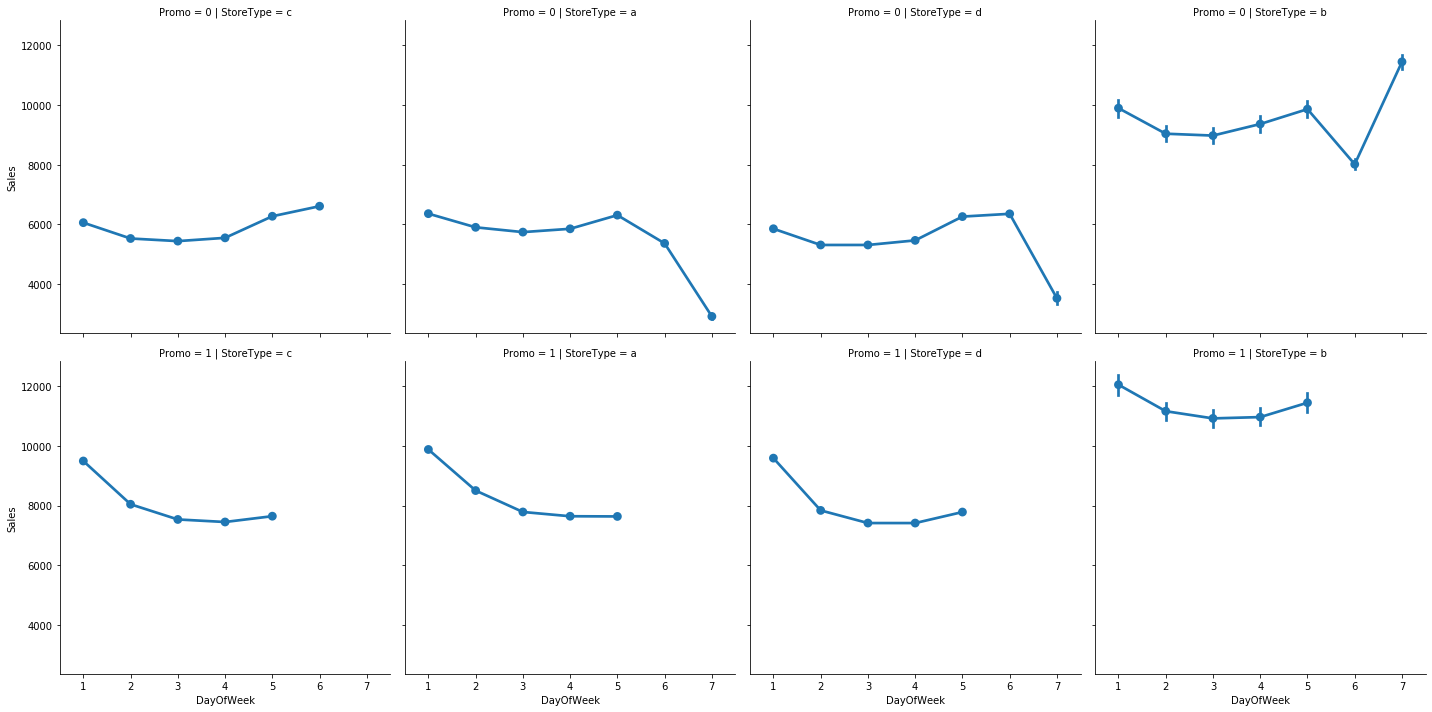

In [0]:
## Sales per DayOfWeek according to Promo and Store Type
sns.catplot(data = master_table, kind = 'point', x = "DayOfWeek", y = "Sales", 
               col = "StoreType",
               row = "Promo")


Note: Promo was generally run on weekdays and not weekends. Mondays show comparatively higher average sales than other days.
Also, StoreType B has higher average sales than other StoreTypes.



### Day of Week & Holidays
- Average Sales and number of customers
- Weekday - Weekend analysis
- StateHoliday and SchoolHoliday

In [0]:
pivot_daysales = train.pivot_table(index=['DayOfWeek'],values=["Sales","Customers"], aggfunc='mean')
pivot_daysales = pivot_daysales.reset_index()
pivot_daysales.columns = ['DayOfWeek','AvgCustomers','AvgSales']
pivot_daysales["DayName"] = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
pivot_daysales

,DayOfWeek,AvgCustomers,AvgSales,DayName
0,1,855.463641,8216.252259,Monday
1,2,770.018825,7088.409086,Tuesday
2,3,740.671932,6728.786679,Wednesday
3,4,755.670769,6768.214973,Thursday
4,5,781.811113,7073.034133,Friday
5,6,660.205023,5875.084935,Saturday
6,7,1441.532424,8224.723908,Sunday


In [0]:

pivot_daysales["Weekday"] = ["Weekday","Weekday","Weekday","Weekday","Weekday","Weekend","Weekend"]
pivot_daysales


,DayOfWeek,AvgCustomers,AvgSales,DayName,Weekday
0,1,855.463641,8216.252259,Monday,Weekday
1,2,770.018825,7088.409086,Tuesday,Weekday
2,3,740.671932,6728.786679,Wednesday,Weekday
3,4,755.670769,6768.214973,Thursday,Weekday
4,5,781.811113,7073.034133,Friday,Weekday
5,6,660.205023,5875.084935,Saturday,Weekend
6,7,1441.532424,8224.723908,Sunday,Weekend


Note : Here we can see that, a Sunday and Monday are recording maximum average sales than any other Day.
Sunday does better in average number of customers than any other day.

In [0]:

pivot_weekend = pivot_daysales.pivot_table(index=['Weekday'],values=["AvgSales","AvgCustomers"], aggfunc='mean')
pivot_weekend

,AvgCustomers,AvgSales
Weekday,,
Weekday,780.727256,7174.939426
Weekend,1050.868724,7049.904421


Note : Here we can see that, Weekends see more number of number of customers, but average sales as well the per day per customer sale is lesser than the weekdays. This might be due to more number of window shoppers. 

Now Let's see if School or State holiday have any effect on the sales and customers.

In [0]:
pivot_ScHoliday = train.pivot_table(index=['SchoolHoliday'],values=["Sales","Customers"], aggfunc='mean')
pivot_ScHoliday

,Customers,Sales
SchoolHoliday,,
0,757.879906,6897.207830
1,783.178586,7200.710282


In [0]:
pivot_ScHoliday = pivot_ScHoliday.reset_index()
pivot_StHoliday = train.pivot_table(index=['StateHoliday'],values=["Sales","Customers"], aggfunc='mean')
pivot_StHoliday = pivot_StHoliday.reset_index()
pivot_StHoliday

,StateHoliday,Customers,Sales
0,0,762.125501,6953.960229
1,a,1279.172911,8487.471182
2,b,1686.889655,9887.889655
3,c,1569.225352,9743.746479


School Holidays see a plunge in the average sales value. State Holidays of type B and C see higher average number of customers and average sales.

### Store Type and Assortment


In [0]:
store.describe(include=['object'])

,StoreType,Assortment,PromoInterval
count,1115,1115,1115
unique,4,3,4
top,a,a,0
freq,602,593,544


In [0]:
store_pivot = store.pivot_table(index=['StoreType','Assortment'],values=["Store"], aggfunc='count')
store_pivot = store_pivot.reset_index()
store_pivot.columns = ['StoreType','Assortment','Count']
store_pivot

,StoreType,Assortment,Count
0,a,a,381
1,a,c,221
2,b,a,7
3,b,b,9
4,b,c,1
5,c,a,77
6,c,c,71
7,d,a,128
8,d,c,220


Text(0.5, 1, 'Distribution of Assortments per StoreType')

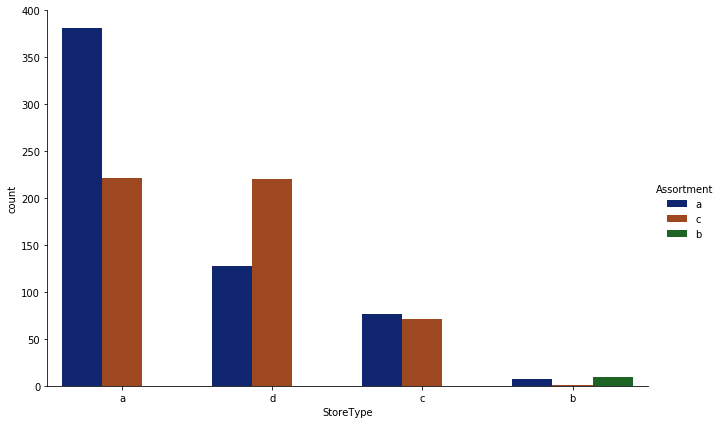

In [0]:
store_plot = sns.catplot(x="StoreType", hue="Assortment", data=store, kind="count", height=6, aspect=1.5, palette='dark', order=['a','d','c', 'b'])
ax.set_title('Distribution of Assortments per StoreType')

In [0]:
Type_pivot = master_table.pivot_table(index=['StoreType'],values=["Sales", "Customers"], aggfunc='mean')
Type_pivot


,Customers,Sales
StoreType,,
a,795.422370,6925.697986
b,2022.211825,10233.380141
c,815.538073,6933.126425
d,606.353935,6822.300064


In [0]:
assort_pivot = master_table.pivot_table(index=['Assortment'],values=["Sales", "Customers"], aggfunc='mean')
assort_pivot

,Customers,Sales
Assortment,,
a,748.000978,6621.523057
b,2067.550250,8642.503594
c,752.202641,7300.843547


Now we will see if Store type and assortment affects Sales in any way

In [0]:
store_pivot = master_table.pivot_table(index=['StoreType','Assortment'],values=["Sales", "Customers"], aggfunc='mean')
store_pivot

Customers         Sales
StoreType Assortment                           
a         a            759.311081   6538.189027
          c            855.819997   7573.822775
b         a           1804.982993  11133.992979
          b           2067.550250   8642.503594
          c           3105.053079  17969.556263
c         a            839.963231   6835.748557
          c            789.254567   7037.913129
d         a            584.033083   6433.756093
          c            619.063299   7043.534764

Note : 
- Store Type : Store Type 'b' shows highest average Customers and highest average sales.

- Assortment : Assortment 'b' show highest average number of customers.

- When we combine the two, we can see Store Type 'b' having assortment 'c', has highest number of customers as well as Average Sales.

In [0]:
store_type_median = master_table.groupby(['StoreType'])['Sales', 'Customers'].median()
store_type_median

,Sales,Customers
StoreType,,
a,6285.0,720.0
b,9130.0,1839.5
c,6408.0,756.0
d,6395.0,577.0


In [0]:
store_type_std = master_table.groupby(['StoreType'])['Sales', 'Customers'].std()
store_type_std

,Sales,Customers
StoreType,,
a,3277.351589,387.516543
b,5155.729868,910.687095
c,2896.958579,329.670020
d,2556.401455,199.247092


In [0]:
# Carryout T-Test

### Competition
- Competition Distance
- Competition Since

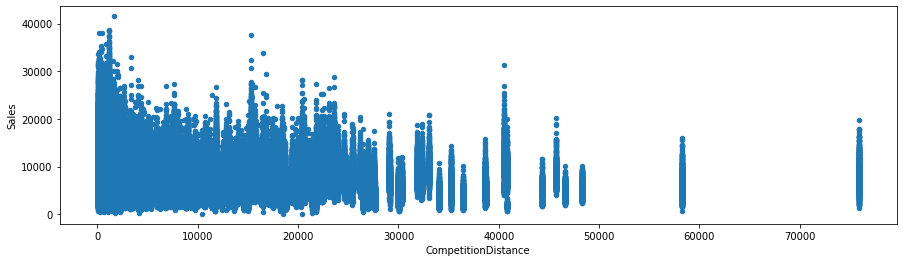

In [0]:
master_table.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))

Text(0.5, 1.0, 'Competition Distance Histogram')

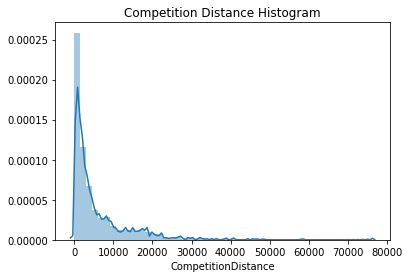

In [0]:
ax = sns.distplot(master_table.CompetitionDistance);
ax.set_title('Competition Distance Histogram')

In [0]:
bins = [0,1000,5000,10000,25000,90000]
master_table['compdist_bucket'] = pd.cut(master_table['CompetitionDistance'], bins)
master_table['compdist_bucket'] = master_table['compdist_bucket'].astype(str)
comp_dist_pivot = master_table.pivot_table(index=['compdist_bucket'],values=["Sales", "Customers"], aggfunc='mean', fill_value=0)
comp_dist_pivot_count = master_table.pivot_table(index=['compdist_bucket'],values=['Sales'], aggfunc='count', fill_value=0)
comp_dist_pivot_count.columns = ['Count']
comp_dist_pivot_count

,Count
compdist_bucket,
"(0, 1000]",250931
"(1000, 5000]",328892
"(10000, 25000]",117063
"(25000, 90000]",25542
"(5000, 10000]",121910


In [0]:
comp_dist_pivot

,Customers,Sales
compdist_bucket,,
"(0, 1000]",924.675345,7302.468962
"(1000, 5000]",733.092176,6827.418000
"(10000, 25000]",658.524649,6940.531603
"(25000, 90000]",666.486297,6295.769282
"(5000, 10000]",629.904208,6742.643204


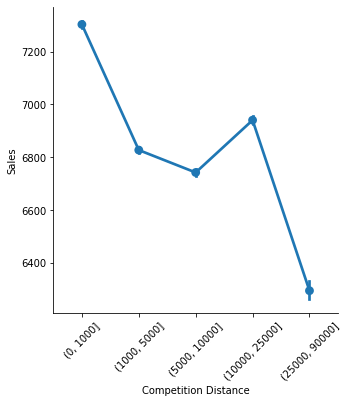

In [0]:
f = sns.catplot(x = 'compdist_bucket', y = 'Sales', data = master_table, kind = 'point', order = ["(0, 1000]", "(1000, 5000]", "(5000, 10000]", "(10000, 25000]", "(25000, 90000]"])
f.set_xticklabels(rotation=45)
f.set_xlabels(label = 'Competition Distance')

Lesser competition distance seems to be accompanied by higher average sales. It could be happening because of customers shopping at the Competition Stores also shopped at the client's stores.

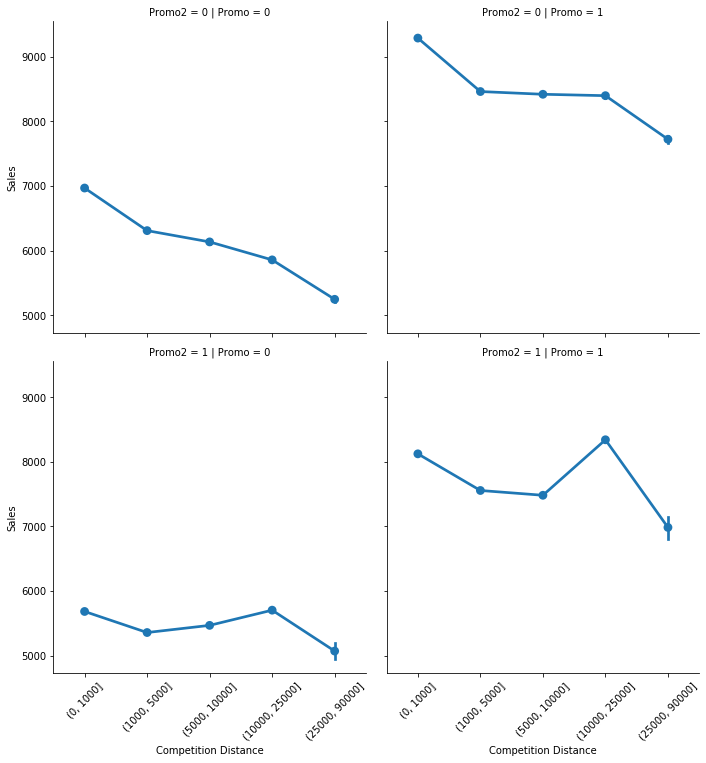

In [0]:
t = sns.catplot(data = master_table, kind = 'point', x = 'compdist_bucket', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2', order = ["(0, 1000]", "(1000, 5000]", "(5000, 10000]", "(10000, 25000]", "(25000, 90000]"]);
for axes in t.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
t.set_xlabels(label = 'Competition Distance');

Our previous observation about stores with Promo having higher average sales persist. Also, stores where competition distance is less seem to be having higher average sales, except the instances where consicutive promotions were executed.  


## Future Scope


- Analyse further with any remaining factors from the dataset.
- Forecsating for the test dataset.